In [1]:
import librosa
audio_path = 'ran1.m4a'
x, sr = librosa.load(audio_path)
print(type(x), type(sr))

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


<class 'numpy.ndarray'> <class 'int'>


In [2]:
librosa.load(audio_path, sr=44100)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.7462208e-06, -4.2509823e-06, -3.5405408e-06], dtype=float32),
 44100)

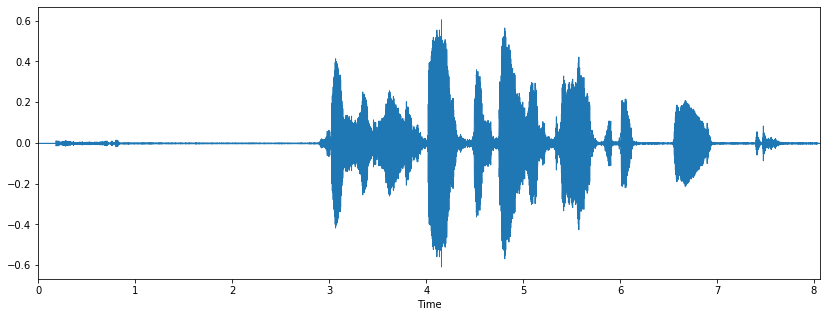

In [3]:
# waveplot
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr = sr)

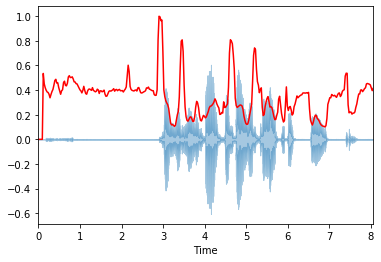

In [5]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

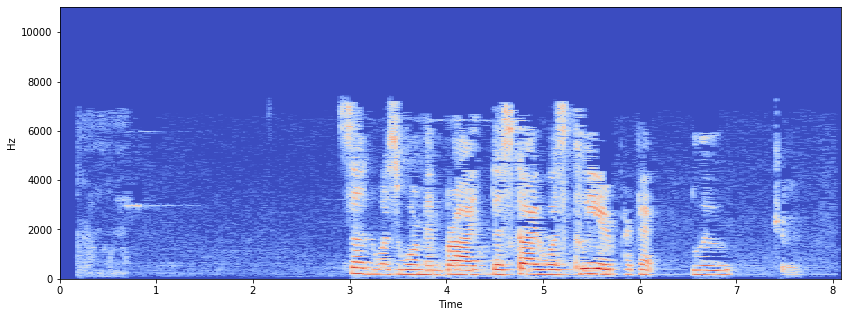

In [12]:
#display spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr = sr, x_axis='time', y_axis='hz')


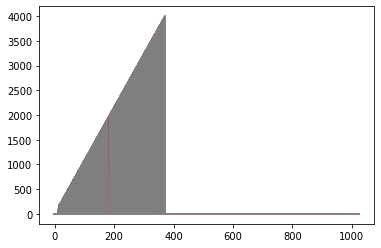

In [21]:
pitches, magnitudes = librosa.piptrack(y = x, sr =sr)
#plt.subplot(212)
#plt.show()
plt.plot(pitches)
plt.show()